In [1]:
from graph_tool import Graph
from graph_tool.draw import graph_draw

In [2]:
graph = Graph()

In [22]:
n = 18
m = 6
graph.add_vertex(n=n)

<generator object Graph.add_vertex.<locals>.<genexpr> at 0x7f401f9d9ac0>

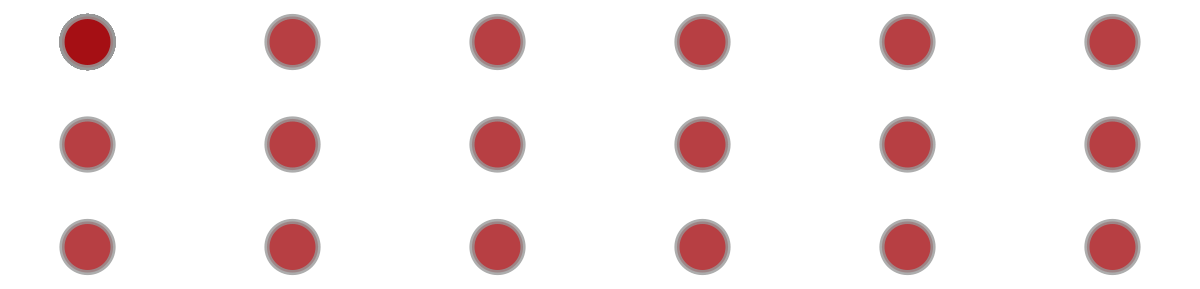

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f40448b6d90, at 0x7f401fa8abe0>

In [27]:
pos = graph.new_vertex_property(value_type="vector<float>")
id = graph.new_vertex_property(value_type="int")
block_counts = graph.new_vertex_property(value_type="vector<int>")
for v in range(0,n):
    vertex = graph.vertex(v)
    x = v % m
    y = v // m
    if ( (y+1) * m >= n):
        disp = ((y+1) * m - n) / 2
        x += disp
    pos[vertex] = [x, y*0.5]
    id[vertex] = v

    count = [0 for i in range(0, n)]
    count[v] += 1
    block_counts[vertex] = count

graph_draw(graph, pos=pos)

In [28]:
from graph_tool.inference import minimize_blockmodel_dl

In [29]:
partition = minimize_blockmodel_dl(graph, B_min=n, B_max=n)

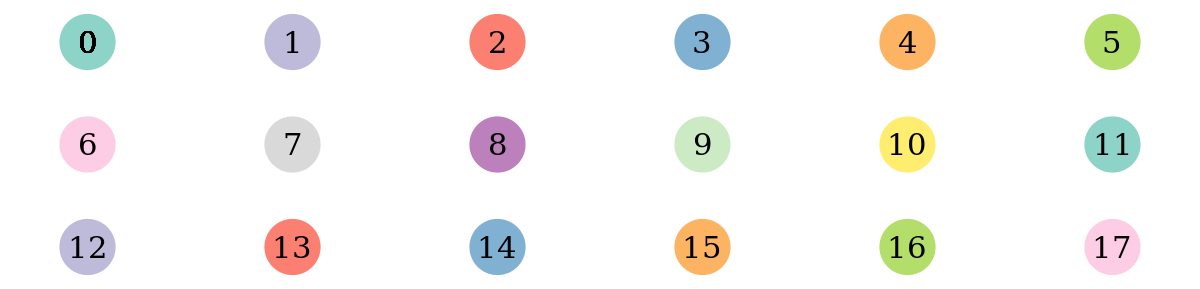

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f40448b6d90, at 0x7f3fdef28430>

In [30]:
partition.draw(pos=pos, vertex_shape="pie", vertex_pie_fractions=block_counts, vprops={"text":id})